生成的完整数据：
     Age  Annual Income (k$)  Spending Score (1-100)
0     27                  23                      44
1     24                  25                      34
2     28                  35                      45
3     32                  34                      48
4     23                  29                      42
..   ...                 ...                     ...
295   56                  85                      23
296   64                  87                      18
297   61                  82                      20
298   64                  86                      27
299   63                  93                      15

[300 rows x 3 columns]
标准化后的完整数据：
          Age  Annual Income (k$)  Spending Score (1-100)
0   -0.911454           -1.451719                0.238613
1   -1.105197           -1.371771               -0.354952
2   -0.846873           -0.972032                0.297970
3   -0.588549           -1.012006                0.476039
4   -1.169778           -1.211

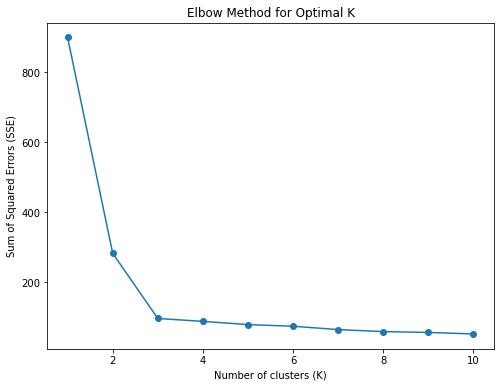

聚类后的完整数据：
     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     27                  23                      44        2
1     24                  25                      34        2
2     28                  35                      45        2
3     32                  34                      48        2
4     23                  29                      42        2
..   ...                 ...                     ...      ...
295   56                  85                      23        1
296   64                  87                      18        1
297   61                  82                      20        1
298   64                  86                      27        1
299   63                  93                      15        1

[300 rows x 4 columns]


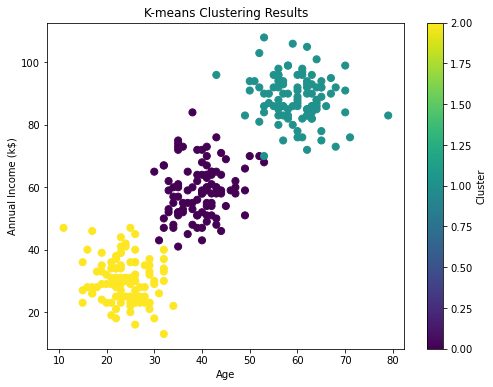

In [8]:
##导入调用所需的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler##np.random.seed(42)是用于设置NumPy中随机数生成器的种子函数的调用。通过设置随机种子，可以确保每次运行程序时生成的随机数序列是相同的。这对于调试代码或确保实验结果的可重复性时非常有用的。
np.random.seed(42)
# 忽略全局警告
import warnings
warnings.filterwarnings("ignore")

# 设置显示负号
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

##生成模拟数据：客户年龄、年收入、消费分数，并取整
age = np.concatenate([np.random.normal(25, 5, 100).astype(int), 
                      np.random.normal(40, 5, 100).astype(int), 
                      np.random.normal(60, 5, 100).astype(int)])
income = np.concatenate([np.random.normal(30, 8, 100).astype(int), 
                         np.random.normal(60, 8, 100).astype(int), 
                         np.random.normal(90, 8, 100).astype(int)])
score = np.concatenate([np.random.normal(40, 6, 100).astype(int), 
                        np.random.normal(60, 6, 100).astype(int), 
                        np.random.normal(20, 6, 100).astype(int)])
##创建DataFrame
data = pd.DataFrame({'Age': age, 'Annual Income (k$)': income, 'Spending Score (1-100)': score})
##显示完整生成的数据
print("生成的完整数据：")
print(data)##在进行聚类之前，先对数据进行标准化，使各变量的范围相同，以确保所有特征对模型的影响是等同的。
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
##将标准化数据转换为DataFrame，方便查看
scaled_data_df = pd.DataFrame(scaled_data, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
##输出标准化后的完整数据
print("标准化后的完整数据：")
print(scaled_data_df)##使用K-means算法对标准化后的数据进行聚类，首先我们需要确定合适的聚类数量。可通过肘部法则来实现。
##肘部法则通过绘制不同K值的总误差平方和（SSE，Sum of Squared Errors）曲线，帮助识别最佳的聚类数量。SSE是所有点到其所属簇中心距离的平方和，他是评估聚类效果的一个重要指标。通常情况下，在K值增加时，SSE会下降，当下降幅度减小时，即图中出现“肘部”位置时，对应的K值就是合适的聚类数量。
##使用肘部法则
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
##绘制肘部法则图
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()
##确定最佳K值并进行聚类
##从肘部图上选择了最佳的K值为3，接下来进行K-均值聚类：
##设置最佳K值
optimal_k = 3  ##这里假设最佳K值为3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)
##输出聚类后的完整数据
print("聚类后的完整数据：")
print(data)##可视化聚类结果
##使用散点图展示每个聚类的分布状况
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Annual Income (k$)'], c=data['Cluster'], cmap='viridis', s=50)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('K-means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()
